In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
%matplotlib inline

In [7]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 356s 2us/step


In [8]:
x_train.shape

(50000, 32, 32, 3)

In [9]:
x_test.shape

(10000, 32, 32, 3)

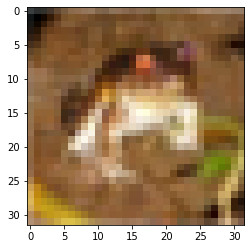

In [14]:
plt.imshow(x_train[0])

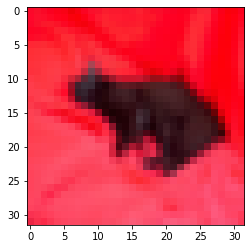

In [15]:
plt.imshow(x_train[21])

In [19]:
x_train[0].shape

(32, 32, 3)

In [22]:
x_train[0].max()

255

In [23]:
x_train.min()

0

In [24]:
from tensorflow.keras.utils import to_categorical

In [25]:
x_train = x_train/255

In [26]:
x_test = x_test/255

In [27]:
y_cat_train = to_categorical(y_train,10)

In [28]:
y_cat_test = to_categorical(y_test,10)

In [30]:
y_cat_train[4]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [31]:
y_cat_test[10]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D

In [33]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(32,32,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(256,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 29, 29, 32)        1568      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        16416     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 800)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               205056    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2

In [35]:
from tensorflow.keras.callbacks import EarlyStopping

In [36]:
early_stop = EarlyStopping(monitor='val_loss',patience=1)

In [38]:
model.fit(x_train,y_cat_train,validation_data=(x_test,y_cat_test),callbacks=[early_stop],epochs=15)

Epoch 1/15
1563/1563 [==============================] - 37s 24ms/step - loss: 1.1566 - accuracy: 0.5900 - val_loss: 1.1118 - val_accuracy: 0.6097
Epoch 2/15
1563/1563 [==============================] - 43s 28ms/step - loss: 1.0036 - accuracy: 0.6488 - val_loss: 1.0425 - val_accuracy: 0.6367
Epoch 3/15
1563/1563 [==============================] - 34s 22ms/step - loss: 0.8939 - accuracy: 0.6882 - val_loss: 0.9730 - val_accuracy: 0.6642
Epoch 4/15
1563/1563 [==============================] - 38s 24ms/step - loss: 0.7954 - accuracy: 0.7222 - val_loss: 0.9489 - val_accuracy: 0.6815
Epoch 5/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.7123 - accuracy: 0.7524 - val_loss: 0.9688 - val_accuracy: 0.6809
Epoch 6/15
1563/1563 [==============================] - 36s 23ms/step - loss: 0.6378 - accuracy: 0.7771 - val_loss: 0.9815 - val_accuracy: 0.6800 - loss: 0.6378 - accuracy: 0.77
Epoch 7/15
1563/1563 [==============================] - 33s 21ms/step - loss: 0.5698 - accur

In [39]:
metrics = pd.DataFrame(model.history.history)

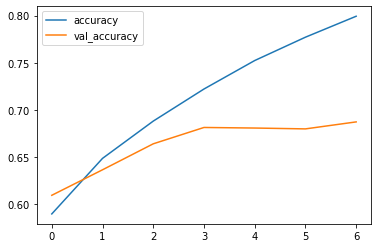

In [40]:
metrics[['accuracy','val_accuracy']].plot()

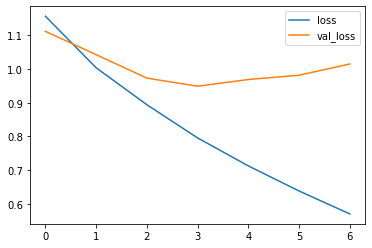

In [41]:
metrics[['loss','val_loss']].plot()

In [44]:
model.evaluate(x_test,y_cat_test,verbose=0)

[1.014817714691162, 0.6873999834060669]

In [45]:
predictions = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [46]:
from sklearn.metrics import confusion_matrix, classification_report

In [47]:
print(classification_report(y_test,predictions))


              precision    recall  f1-score   support

           0       0.71      0.73      0.72      1000
           1       0.86      0.77      0.81      1000
           2       0.53      0.59      0.56      1000
           3       0.54      0.46      0.50      1000
           4       0.61      0.67      0.64      1000
           5       0.65      0.51      0.57      1000
           6       0.71      0.81      0.76      1000
           7       0.71      0.76      0.73      1000
           8       0.77      0.81      0.79      1000
           9       0.80      0.76      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.69      0.69      0.69     10000
weighted avg       0.69      0.69      0.69     10000

[[730  12  63  16  35   5  20  16  71  32]
 [ 40 772  15   7   6   4  23   9  51  73]
 [ 55   4 591  49 107  44  75  44  18  13]
 [ 27   8 112 461  94 132  83  46  23  14]
 [ 17   2  87  42 666  40  42  84  16   4]
 [ 11   2  90 173  73 512 

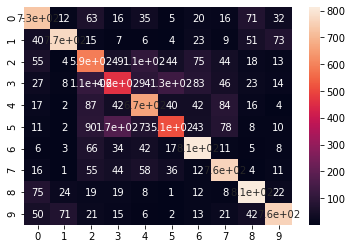

In [50]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True)

In [51]:
my_image = x_test[16]

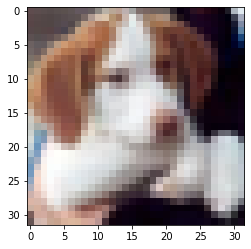

In [52]:
plt.imshow(my_image)

In [53]:
model.predict_classes(my_image.reshape(1,32,32,3))

array([5], dtype=int64)

In [54]:
y_test[16]

array([5], dtype=uint8)